<a href="https://colab.research.google.com/github/Deb052024/Machine-Prediction/blob/main/Mobile_Handset_Price_(10)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_excel('/content/Processed_Flipdata.xlsx')

In [4]:
#info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
#Null value check
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [6]:
#EDA on the data set
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [7]:
#Duplicate Value check
df.duplicated().sum()

0

In [8]:
#Renaming Prize Column to Price
df.rename(columns={'Prize':'Price'},inplace=True)

In [9]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [10]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [12]:
df_final=df.drop(['Unnamed: 0'],axis=1)
#Dropping unnecessary column from Analysis and puttingrest into df_final dataFrame

In [13]:
df_final.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

In [14]:
numerical_col=df_final[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


In [15]:
categorical_col=df[['Model','Colour','Rear Camera','Front Camera','Processor_']]
categorical_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [16]:
#Feature Values count,extraction and special attributes in Feature TreatMent
counter=3
def feature(df,columns,counter):
  for column in columns:
    feature_counts=df[column].value_counts()
    other_categories=feature_counts[feature_counts<counter].index
    df[column]=df[column].where(~df[column].isin(other_categories),'Lesser')

feature(df_final,categorical_col,counter)

# Optional: Print value counts for each column
for column in categorical_col:
    print(f"Value counts for {column}:")
    print(df_final[column].value_counts())
    print("\n")

Value counts for Model:
Model
Lesser                   144
SAMSUNG Galaxy A14 5G      9
REDMI Note 12 Pro 5G       9
vivo Y16                   9
realme C55                 9
                        ... 
realme Narzo 50            3
MOTOROLA g52               3
OPPO A17k                  3
realme 9 Pro+ 5G           3
vivo V25 Pro 5G            3
Name: count, Length: 89, dtype: int64


Value counts for Colour:
Colour
Lesser              295
Yellow               12
Power Black           8
Royal Blue            8
Black                 8
Midnight Black        7
Cool Blue             7
Aqua Blue             6
Glacier Blue          6
Force Black           6
Blue                  5
M3)                   5
Racing Black          5
OMG Black             5
Nebula Blue           5
Carbon Black          5
Light Green           5
Hyperspace            4
Light Silver          4
Horizon Blue          4
Dark Blue             4
Marine Blue           4
Light Blue            4
Night Sea             4
Pac

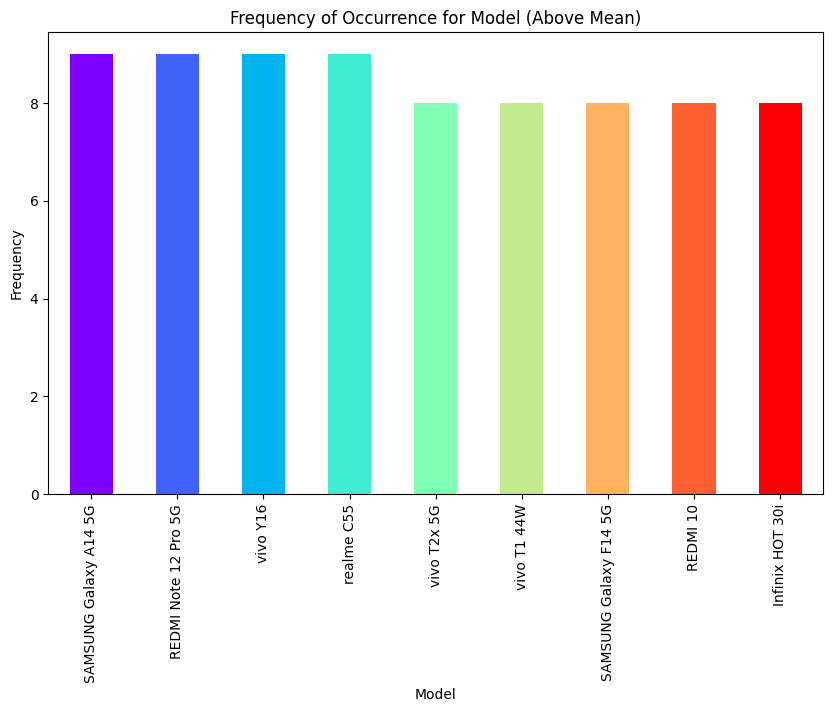

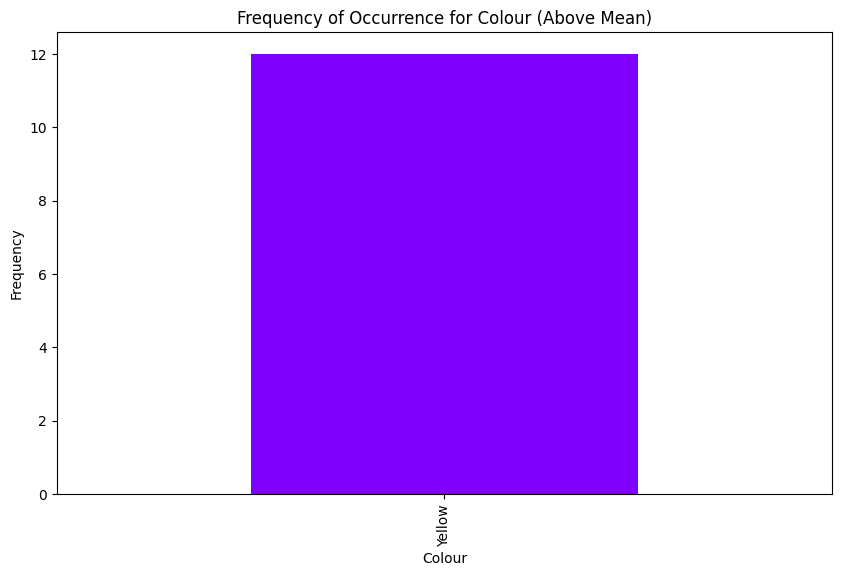

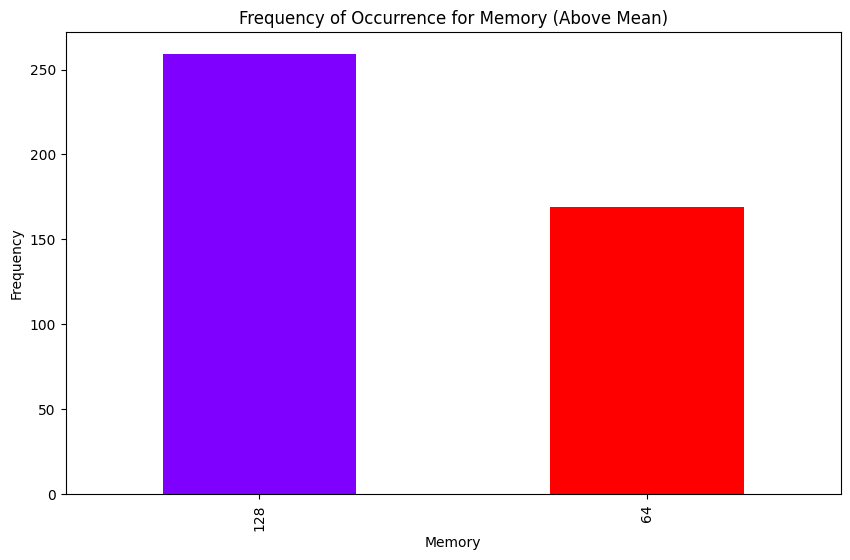

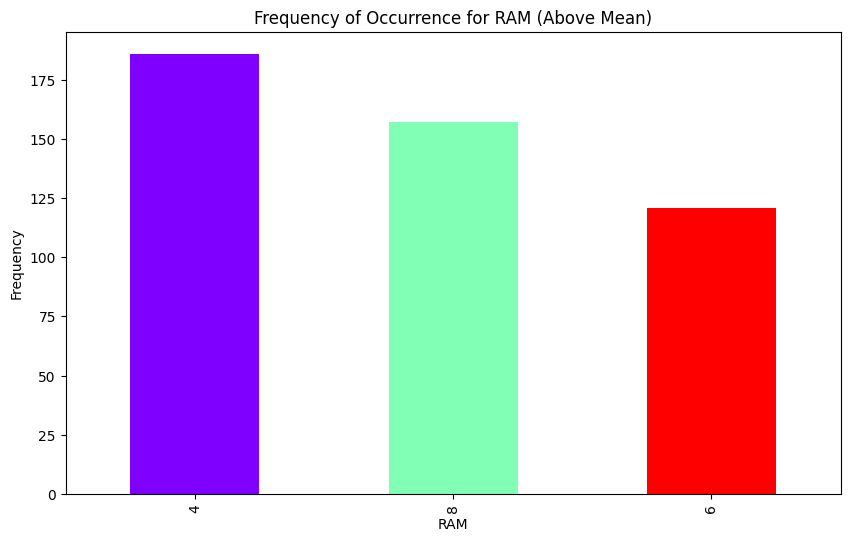

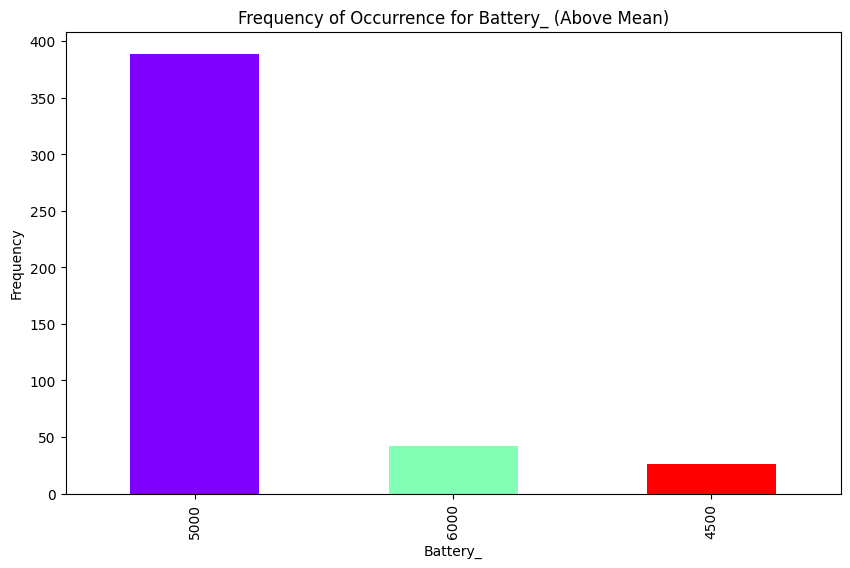

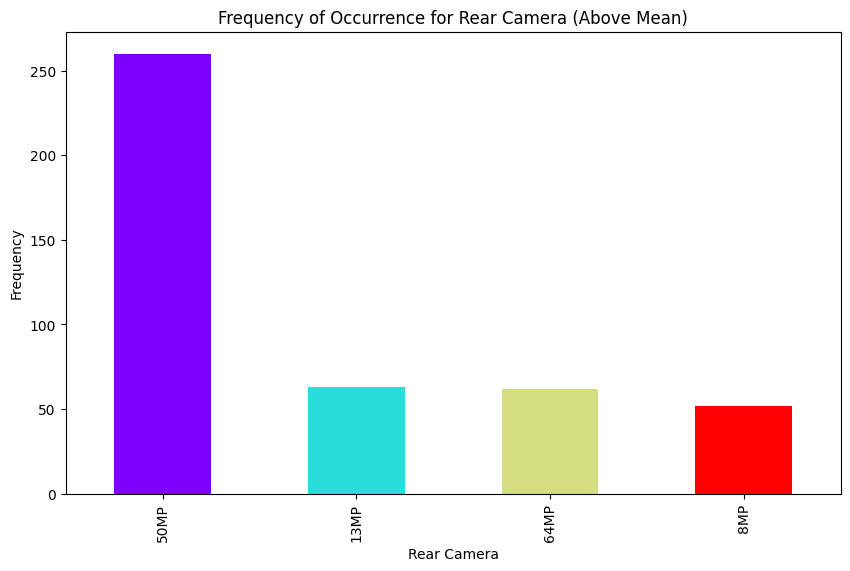

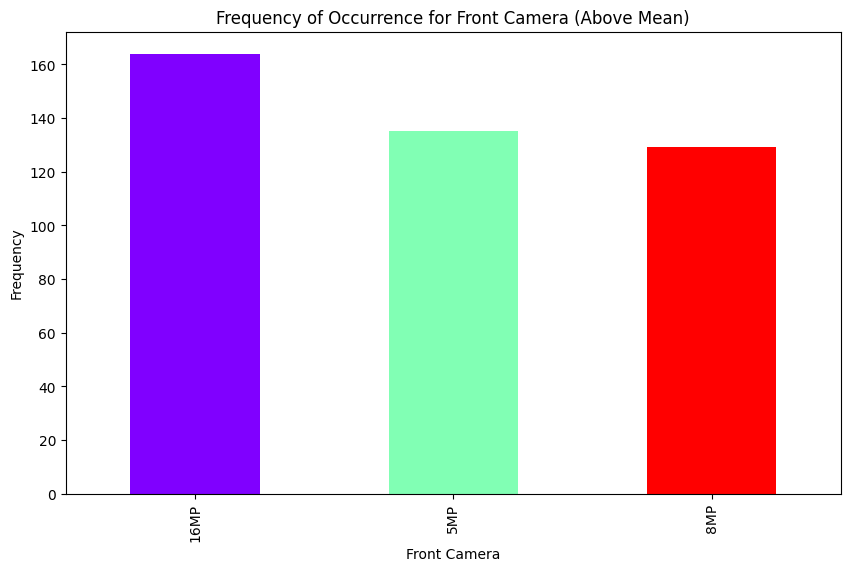

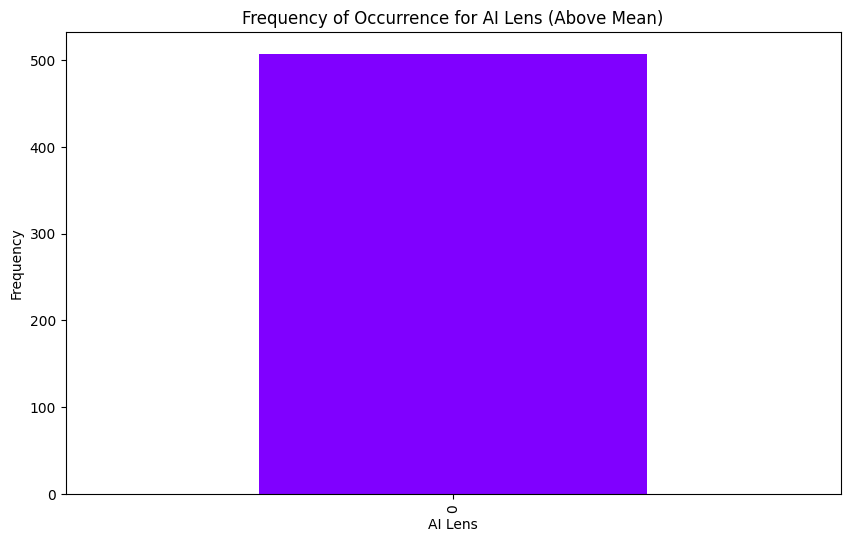

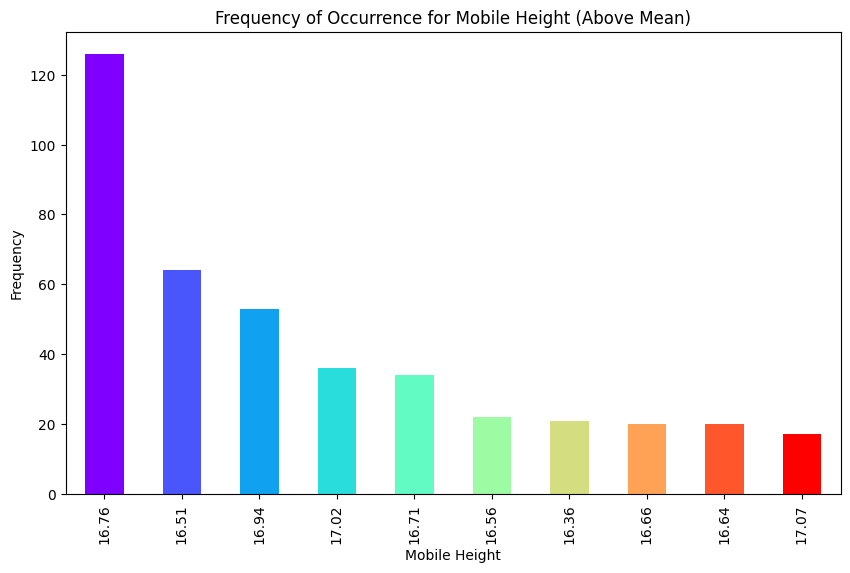

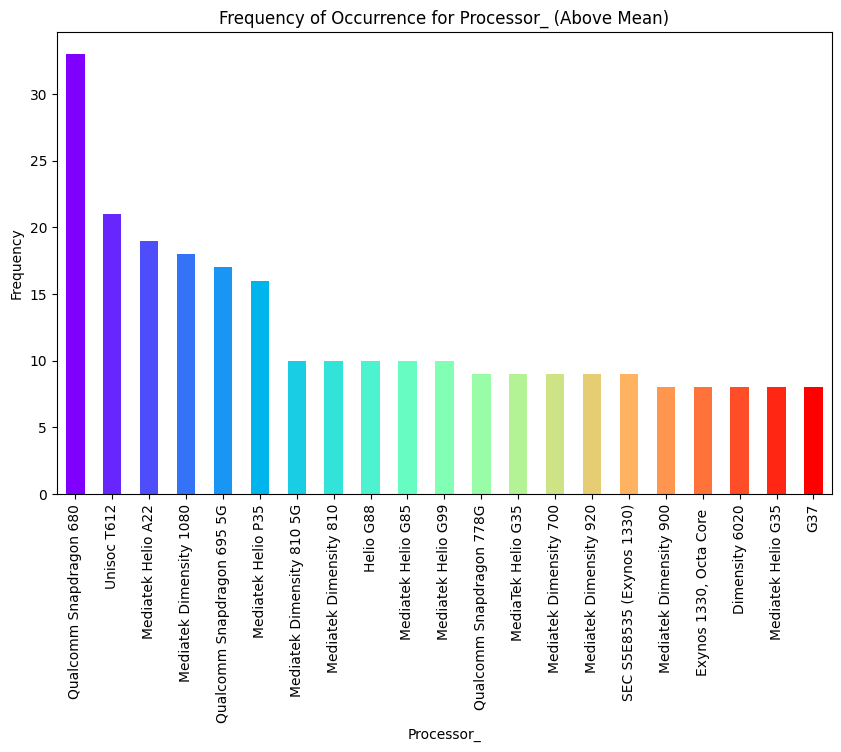

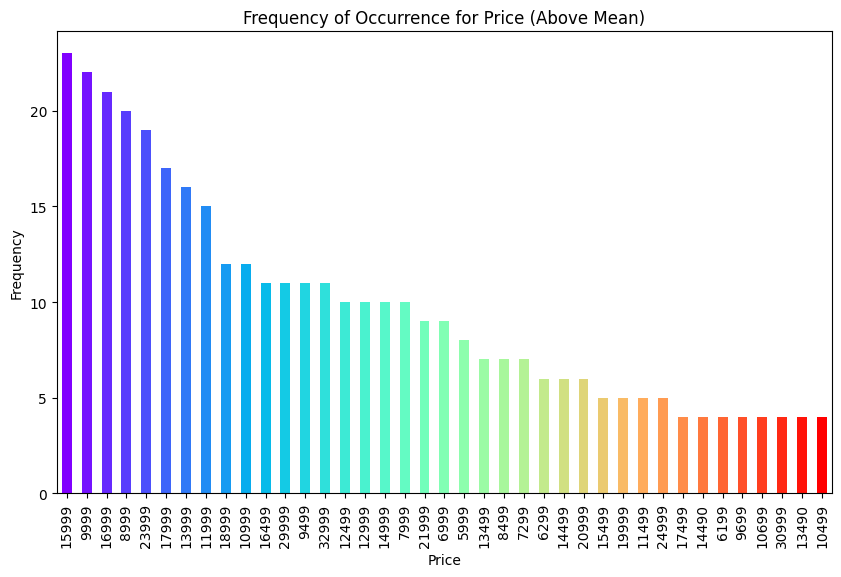

In [17]:
#Bar plot of the features other than Lesser  and its frequency of occurance is more than the mean value and plot color is rainbow

import matplotlib.pyplot as plt

for column in df_final:
  feature_counts = df_final[column].value_counts()
  features_above_mean = feature_counts[feature_counts > feature_counts.mean()]
  if not features_above_mean.empty:
    features_above_mean = features_above_mean[features_above_mean.index != 'Lesser']
    if not features_above_mean.empty:
      plt.figure(figsize=(10, 6))
      features_above_mean.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(features_above_mean))))
      plt.title(f"Frequency of Occurrence for {column} (Above Mean)")
      plt.xlabel(column)
      plt.ylabel("Frequency")
      plt.show()


In [18]:
df_final['Model'].value_counts(['Lesser'])
#df['fuel_type'].isnull().value_counts()/len(df['fuel_type'])*100

,proportion
Model,
Lesser,0.266174
SAMSUNG Galaxy A14 5G,0.016636
REDMI Note 12 Pro 5G,0.016636
vivo Y16,0.016636
realme C55,0.016636
...,...
realme Narzo 50,0.005545
MOTOROLA g52,0.005545
OPPO A17k,0.005545


In [19]:
for column in categorical_col:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()
    #Print the unique values in the categorical columns

Unique values in 'Model':
['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'mic

<Axes: >

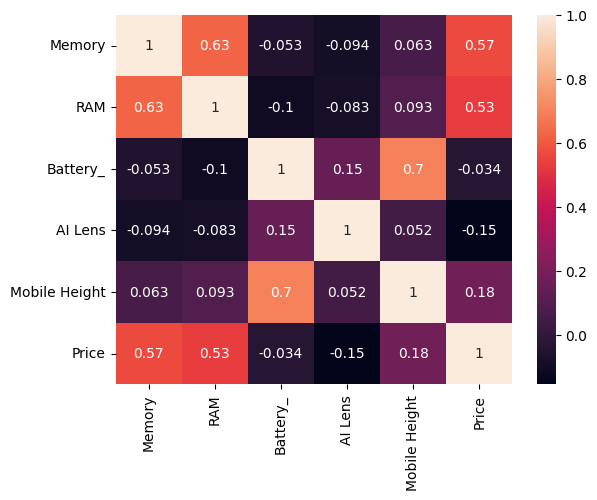

In [20]:
sns.heatmap(numerical_col.corr(),annot=True)

In [21]:
#Label Encoding the Categorical Features
le=LabelEncoder()
for column in categorical_col:
  df_final[column]=le.fit_transform(df_final[column])


<Axes: >

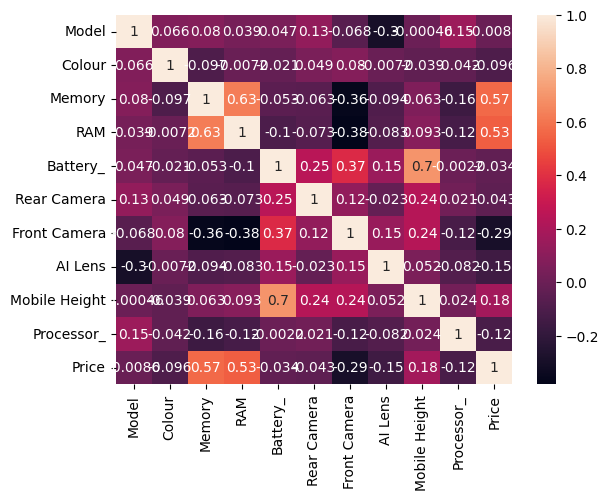

In [22]:
sns.heatmap(df_final.corr(),annot=True)
#Correlation among the features present in the data Frame df_final

In [23]:
df_final.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
Model,1.000000,0.066469,0.079546,0.039078,0.046978,0.125517,-0.067923,-0.299453,-0.000457,0.153663,-0.008591
Colour,0.066469,1.000000,-0.097242,-0.007154,-0.021033,0.048796,0.079634,-0.007244,-0.039224,-0.041765,-0.095782
Memory,0.079546,-0.097242,1.000000,0.625284,-0.053210,-0.062725,-0.361646,-0.094442,0.063163,-0.155522,0.566660
RAM,0.039078,-0.007154,0.625284,1.000000,-0.104923,-0.073380,-0.381846,-0.082622,0.092951,-0.124870,0.532024
Battery_,0.046978,-0.021033,-0.053210,-0.104923,1.000000,0.245957,0.374791,0.150156,0.695641,-0.002150,-0.034297
Rear Camera,0.125517,0.048796,-0.062725,-0.073380,0.245957,1.000000,0.124321,-0.022927,0.235373,0.021044,-0.043153
Front Camera,-0.067923,0.079634,-0.361646,-0.381846,0.374791,0.124321,1.000000,0.146588,0.237274,-0.120970,-0.290620
AI Lens,-0.299453,-0.007244,-0.094442,-0.082622,0.150156,-0.022927,0.146588,1.000000,0.052018,-0.082015,-0.153691
Mobile Height,-0.000457,-0.039224,0.063163,0.092951,0.695641,0.235373,0.237274,0.052018,1.000000,0.023778,0.176009
Processor_,0.153663,-0.041765,-0.155522,-0.124870,-0.002150,0.021044,-0.120970,-0.082015,0.023778,1.000000,-0.115475


**Feature Segregation**

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
X = df_final.iloc[:,0:10] # Independent columns
y = df_final.iloc[:,[-1]]

In [26]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
0,10,28,64,4,6000,3,7,1,16.76,64
1,10,28,64,4,6000,3,7,1,16.76,64
2,18,28,128,8,5000,7,3,0,16.64,45
3,29,50,32,2,5000,10,7,0,16.56,33
4,6,28,128,8,5000,7,7,1,16.76,8
...,...,...,...,...,...,...,...,...,...,...
536,16,28,256,8,3900,7,1,0,15.49,14
537,16,28,32,2,3100,8,4,0,12.70,42
538,16,58,64,4,5000,7,9,0,16.76,17
539,52,28,128,8,5000,7,5,0,16.26,6


In [27]:
y

,Price
0,7299
1,7299
2,11999
3,5649
4,8999
...,...
536,79999
537,5998
538,9990
539,38999


**Feature Importance**

In [28]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [29]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Model,4434.824602
1,Colour,768.170693
2,Memory,14126.732211
3,RAM,305.284365
4,Battery_,61410.920261
5,Rear Camera,339.381693
6,Front Camera,512.545959
7,AI Lens,212.897549
8,Mobile Height,144.142050
9,Processor_,3222.077329


In [30]:
print(featureScores.nlargest(4,'Score'))

        Specs         Score
4    Battery_  61410.920261
2      Memory  14126.732211
0       Model   4434.824602
9  Processor_   3222.077329


**Extra Tree Classifier Method**

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.17695126 0.06974616 0.0773211  0.10125124 0.06956619 0.09697951
 0.0800094  0.0180957  0.13595077 0.17412866]


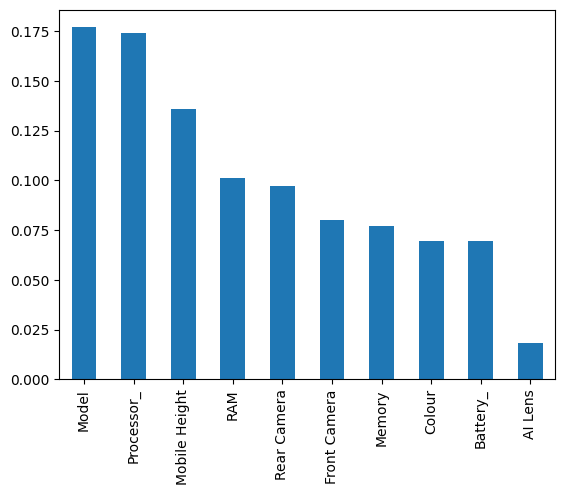

In [32]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [33]:
df.groupby(['Model','Colour'])['Price'].mean().sort_values(ascending=False)
#Model and Colour wise grouping and Price Display

Model                  Colour       
APPLE iPhone 14 Plus   Midnight         80999.0
                       Purple           80999.0
                       Starlight        80999.0
SAMSUNG Galaxy S23 5G  Cream            79999.0
Google Pixel 7         Lemongrass       55999.0
                                         ...   
micromax               Light Silver      1375.0
micromax 2             Nebula Green      1299.0
micromax 1             Eclipse Black     1299.0
micromax               Lake Blue         1199.0
redmi min              M3)                920.0
Name: Price, Length: 386, dtype: float64

In [34]:
#To find out Apple model Phone details
apple_models = df[df['Model'].str.contains('Apple', case=False, na=False)]
print(apple_models)


     Unnamed: 0                 Model     Colour  Memory  RAM  Battery_  \
474         546       APPLE iPhone 11      Black      64    8      3110   
493         576  APPLE iPhone 14 Plus   Midnight     128    6      4323   
520         614  APPLE iPhone 14 Plus     Purple     128    3      4323   
525         621  APPLE iPhone 14 Plus  Starlight     128    4      4323   
532         631       APPLE iPhone 12       Blue      64    8      2815   

    Rear Camera Front Camera  AI Lens  Mobile Height Processor_  Price  
474        12MP         12MP        0          15.49        ios  41199  
493        12MP         12MP        0          17.02        IOS  80999  
520        12MP         12MP        0          17.02     6 Core  80999  
525        12MP         12MP        0          17.02        ios  80999  
532        12MP         12MP        0          15.49        ios  53999  


In [35]:
# find the apple models  with top 3 prices

apple_models = df[df['Model'].str.contains('Apple', case=False, na=False)]
top_3_apple_prices = apple_models.nlargest(3, 'Price')
print(top_3_apple_prices[['Model', 'Price']])


                    Model  Price
493  APPLE iPhone 14 Plus  80999
520  APPLE iPhone 14 Plus  80999
525  APPLE iPhone 14 Plus  80999


In [36]:
# Under Each Model Find the top 3 prices and fetch thier features

def get_top_3_prices_by_model(df):
  """
  Finds the top 3 highest prices for each model and returns their features.
  """
  top_3_prices_per_model = {}
  for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    top_3 = model_data.nlargest(3, 'Price')
    if not top_3.empty:
      top_3_prices_per_model[model] = top_3
  return top_3_prices_per_model


top_3_prices_dict = get_top_3_prices_by_model(df_final)

# Print the results (you can customize the output as needed)
for model, top_3_df in top_3_prices_dict.items():
  print(f"Top 3 Prices for Model: {model}")
  print(top_3_df[['Model', 'Price', 'Colour', 'Rear Camera', 'Processor_']])  # Include relevant features
  print("\n")


Top 3 Prices for Model: 10
    Model  Price  Colour  Rear Camera  Processor_
0      10   7299      28            3          64
1      10   7299      28            3          64
12     10   7299      28            3          64


Top 3 Prices for Model: 18
     Model  Price  Colour  Rear Camera  Processor_
2       18  11999      28            7          45
43      18  11999      28            7          45
273     18  10999      28            7          45


Top 3 Prices for Model: 29
     Model  Price  Colour  Rear Camera  Processor_
53      29   6999      50           10          33
76      29   6299      50           10          33
106     29   6299      28           10          33


Top 3 Prices for Model: 6
   Model  Price  Colour  Rear Camera  Processor_
4      6   8999      28            7           8
5      6   8999      21            7           8
6      6   8999      37            7           8


Top 3 Prices for Model: 39
     Model  Price  Colour  Rear Camera  Processor_
41 

In [37]:
#details of 493 row

row_details = df_final.loc[493]  # Note: DataFrame index starts from 0, so 493rd row is at index 492
print(row_details)


Model                0.00
Colour              28.00
Memory             128.00
RAM                  6.00
Battery_          4323.00
Rear Camera          2.00
Front Camera         1.00
AI Lens              0.00
Mobile Height       17.02
Processor_          14.00
Price            80999.00
Name: 493, dtype: float64


In [38]:
df.groupby(['Model','Battery_','Processor_','Rear Camera'])['Price'].mean().sort_values(ascending=False)

Model                  Battery_  Processor_                   Rear Camera
APPLE iPhone 14 Plus   4323      6 Core                       12MP           80999.0
                                 IOS                          12MP           80999.0
                                 ios                          12MP           80999.0
SAMSUNG Galaxy S23 5G  3900      Qualcomm Snapdragon 8 Gen 2  50MP           79999.0
Google Pixel 7         4270      Google Tensor G2             50MP           55999.0
                                                                              ...   
micromax               2550      SC6531E                      0MP             1375.0
micromax 2             800       SC6531E                      0MP             1299.0
micromax 1             800       SC6531E                      0MP             1299.0
micromax               1500      Mediatek MT6261D             0MP             1199.0
redmi min              1000      Spreadtrum                   0MP              920.0
Name: Price, Length: 207, dtype: float64

In [39]:
df.groupby(['Model','Battery_','RAM','Mobile Height'])['Price'].mean().sort_values(ascending=False)

Model                  Battery_  RAM  Mobile Height
APPLE iPhone 14 Plus   4323      3    17.02            80999.0
                                 4    17.02            80999.0
                                 6    17.02            80999.0
SAMSUNG Galaxy S23 5G  3900      8    15.49            79999.0
Google Pixel 7         4270      8    16.00            55999.0
                                                        ...   
micromax               2550      3    4.50              1375.0
micromax 2             800       8    4.50              1299.0
micromax 1             800       8    4.50              1299.0
micromax               1500      4    6.10              1199.0
redmi min              1000      4    4.57               920.0
Name: Price, Length: 266, dtype: float64

In [40]:
df.groupby(['Model','Colour','Rear Camera'])['Price'].mean().sort_values(ascending=False)

Model                  Colour         Rear Camera
APPLE iPhone 14 Plus   Midnight       12MP           80999.0
                       Purple         12MP           80999.0
                       Starlight      12MP           80999.0
SAMSUNG Galaxy S23 5G  Cream          50MP           79999.0
Google Pixel 7         Lemongrass     50MP           55999.0
                                                      ...   
micromax               Light Silver   0MP             1375.0
micromax 1             Eclipse Black  0MP             1299.0
micromax 2             Nebula Green   0MP             1299.0
micromax               Lake Blue      0MP             1199.0
redmi min              M3)            0MP              920.0
Name: Price, Length: 390, dtype: float64

In [41]:
# find the model details with apple and samsung model name and highest price for both the models

# Find the highest price for Apple models
apple_df = df[df['Model'].str.contains('Apple', case=False, na=False)]
highest_apple_price = apple_df['Price'].max()
apple_highest_price_details = apple_df[apple_df['Price'] == highest_apple_price]

# Find the highest price for Samsung models
samsung_df = df[df['Model'].str.contains('Samsung', case=False, na=False)]
highest_samsung_price = samsung_df['Price'].max()
samsung_highest_price_details = samsung_df[samsung_df['Price'] == highest_samsung_price]


print("Apple Model with Highest Price:")
print(apple_highest_price_details)
print("\n")

print("Samsung Model with Highest Price:")
print(samsung_highest_price_details)



Apple Model with Highest Price:
     Unnamed: 0                 Model     Colour  Memory  RAM  Battery_  \
493         576  APPLE iPhone 14 Plus   Midnight     128    6      4323   
520         614  APPLE iPhone 14 Plus     Purple     128    3      4323   
525         621  APPLE iPhone 14 Plus  Starlight     128    4      4323   

    Rear Camera Front Camera  AI Lens  Mobile Height Processor_  Price  
493        12MP         12MP        0          17.02        IOS  80999  
520        12MP         12MP        0          17.02     6 Core  80999  
525        12MP         12MP        0          17.02        ios  80999  


Samsung Model with Highest Price:
     Unnamed: 0                  Model Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G  Cream     256    8      3900   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   

                      Processor_  Price  
536  Qualcomm Snapdragon 8 Gen 2  79999

In [42]:
df.groupby(['Memory','RAM','Model'])['Price'].mean().sort_values(ascending=False)

Memory  RAM  Model                
128     3    APPLE iPhone 14 Plus     80999.0
        4    APPLE iPhone 14 Plus     80999.0
        6    APPLE iPhone 14 Plus     80999.0
256     8    SAMSUNG Galaxy S23 5G    79999.0
128     8    Google Pixel 7           55999.0
                                       ...   
32      3    micromax                  1375.0
256     8    micromax 1                1299.0
             micromax 2                1299.0
64      4    micromax                  1199.0
16      4    redmi min                  920.0
Name: Price, Length: 283, dtype: float64

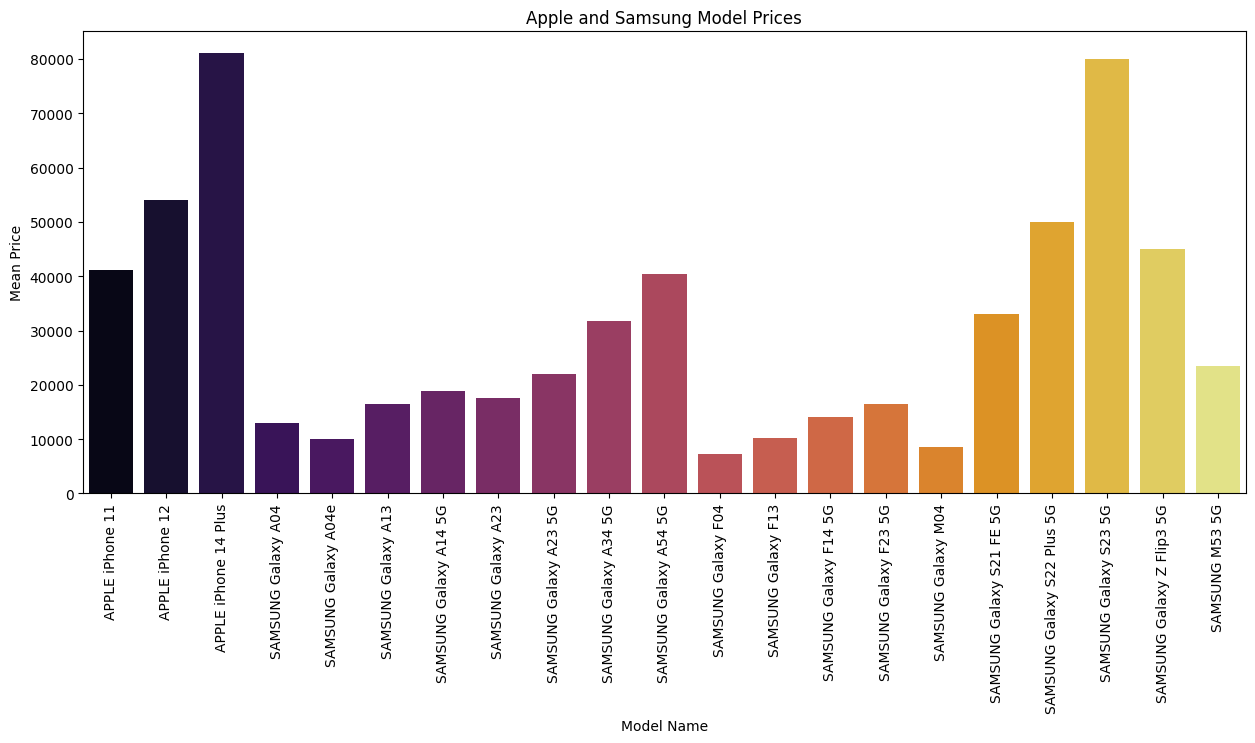

In [43]:
# extract apple and samsung model names and plot bar plot on apple ,samsung model vs their price


apple_models = df[df['Model'].str.contains('Apple', case=False, na=False)]
samsung_models = df[df['Model'].str.contains('Samsung', case=False, na=False)]




apple_samsung_df = pd.concat([apple_models, samsung_models])

# Group by model name and calculate the mean price for each model
model_price_df = apple_samsung_df.groupby('Model')['Price'].mean().reset_index()

# Plot a bar chart of Apple and Samsung model names vs their mean price
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Price', data=model_price_df,palette='inferno')
plt.title('Apple and Samsung Model Prices')
plt.xlabel('Model Name')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Cell Phone Height Distribution')

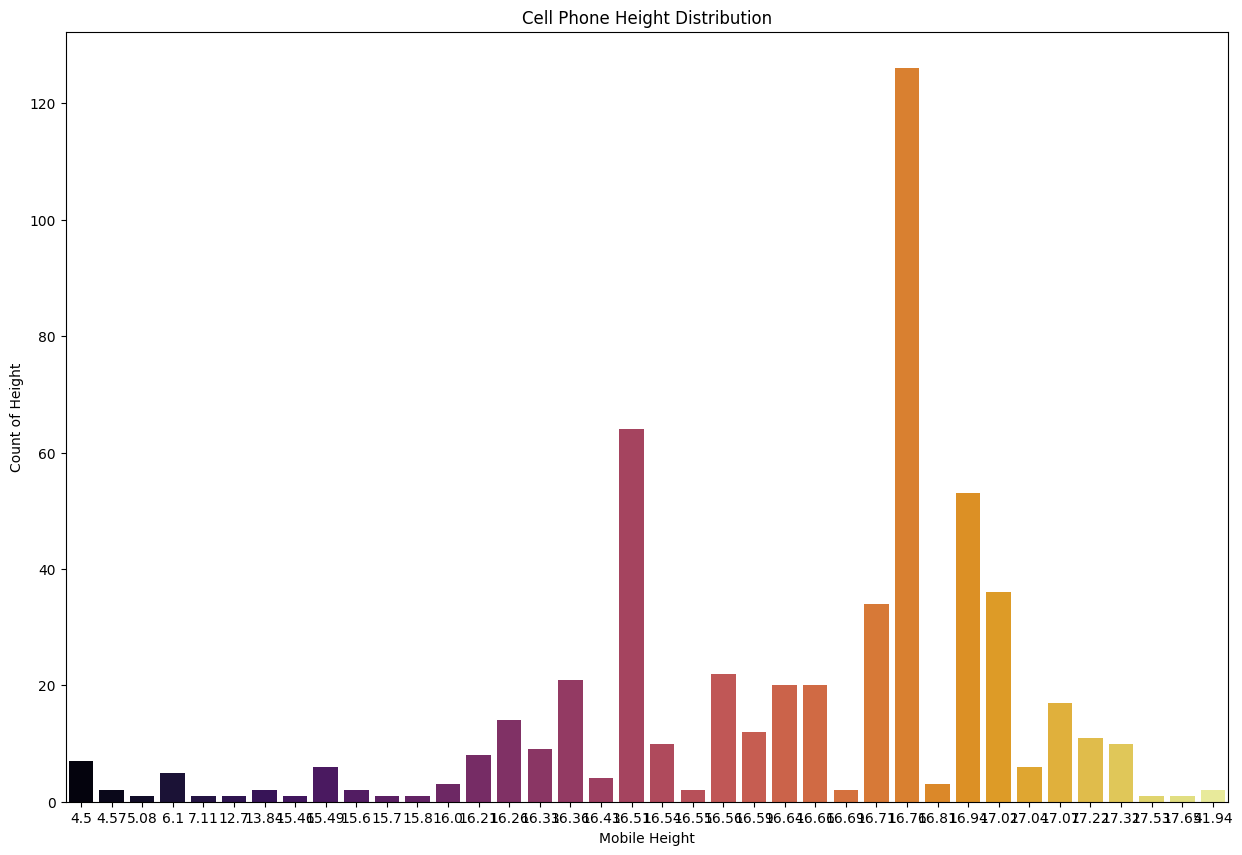

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(x='Mobile Height',data=df, palette='inferno')
sns.set_style('dark')
plt.xlabel('Mobile Height')
plt.ylabel('Count of Height')
plt.title('Cell Phone Height Distribution')
#Maximum Cell phones with 4 GB memory, followed by 8 GB Memory

Text(0.5, 1.0, 'Mobile Height vs Price')

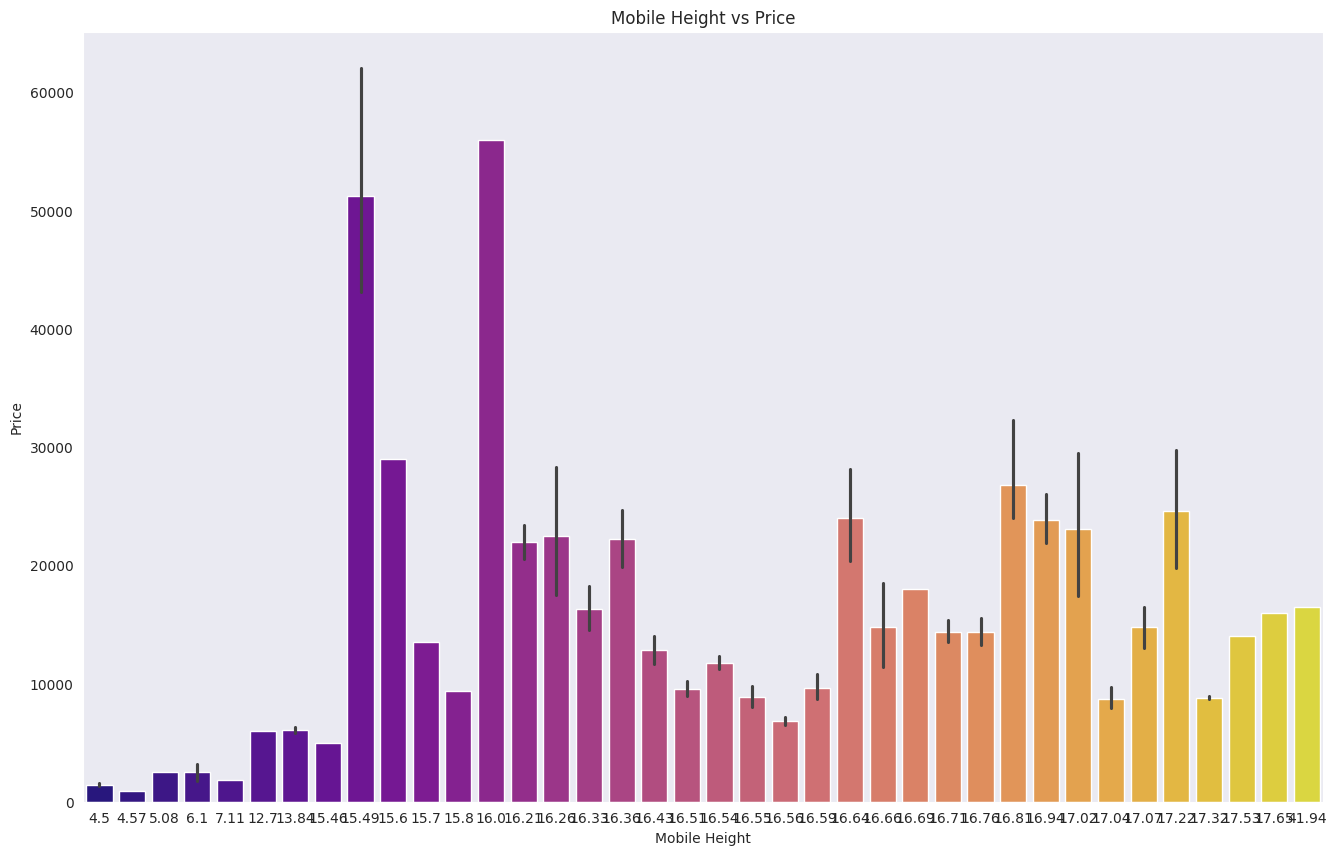

In [45]:
plt.figure(figsize=(16,10))
sns.barplot(x=df['Mobile Height'],y=df['Price'],palette='plasma')
sns.set_style('darkgrid')
plt.xlabel('Mobile Height')
plt.ylabel('Price')
plt.title('Mobile Height vs Price')

Text(0.5, 1.0, 'RAM Distribution')

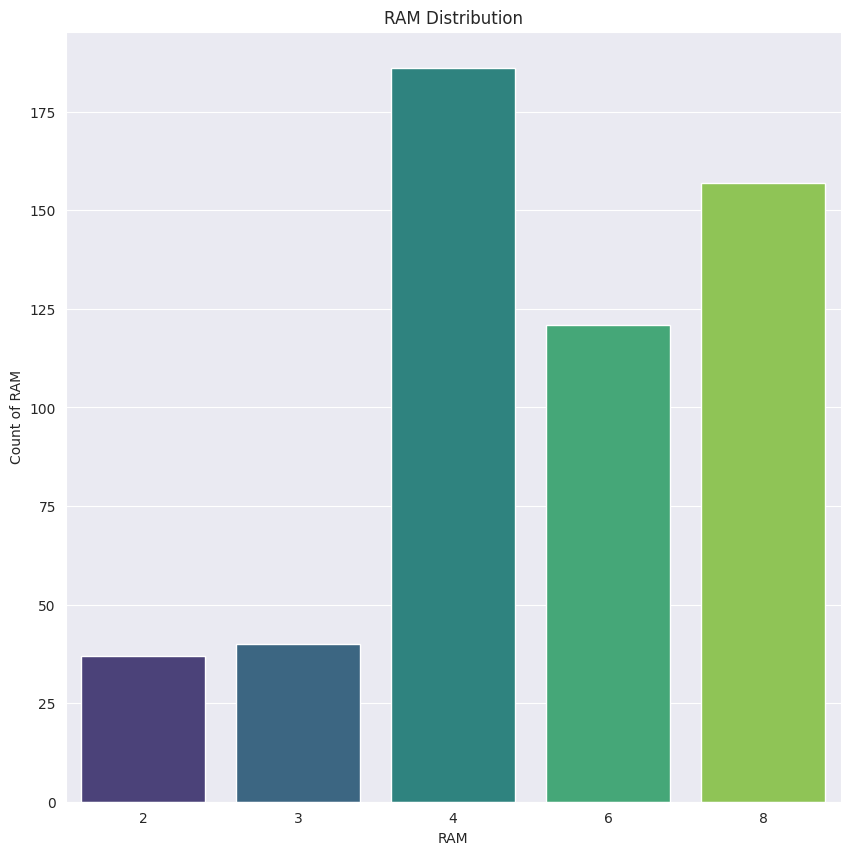

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(x='RAM',data=df, palette='viridis')
sns.set_style('dark')
plt.xlabel('RAM')
plt.ylabel('Count of RAM')
plt.title('RAM Distribution')
#Maximum Cell phones with 4 GB memory, followed by 8 GB Memory

Text(0.5, 1.0, 'RAM vs Price')

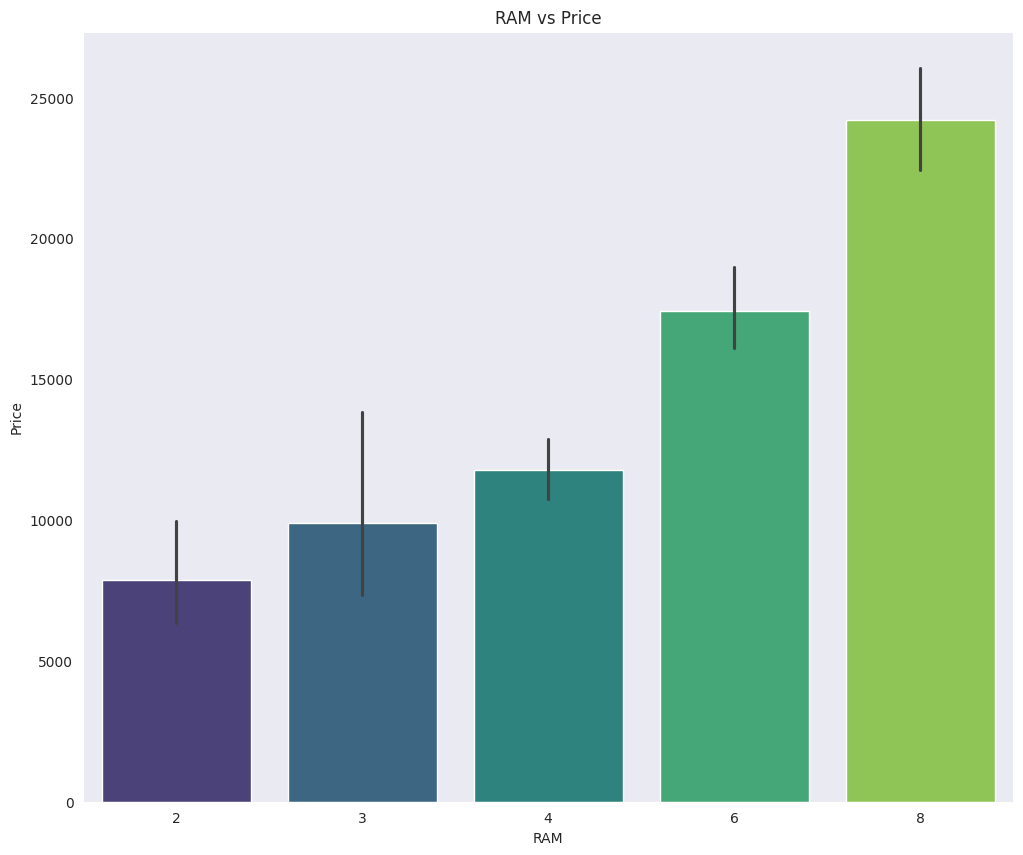

In [47]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['RAM'],y=df['Price'],palette='viridis')
sns.set_style('darkgrid')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('RAM vs Price')

Text(0.5, 1.0, 'Memory Distribution')

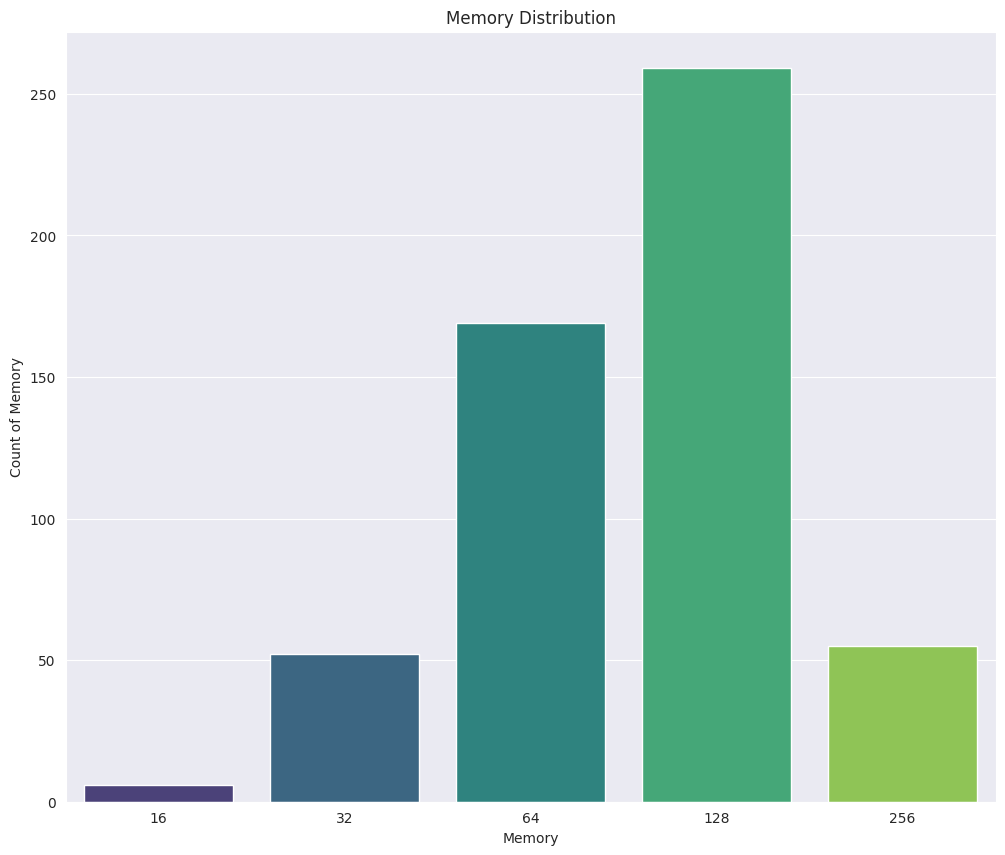

In [48]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Memory'],palette='viridis')
sns.set_style('darkgrid')
plt.xlabel('Memory')
plt.ylabel('Count of Memory')
plt.title('Memory Distribution')
#Maximum cell phones with 128GB memory , followed by 64GB. Very few are having 256 GB memory

Text(0.5, 1.0, 'Memory vs Price')

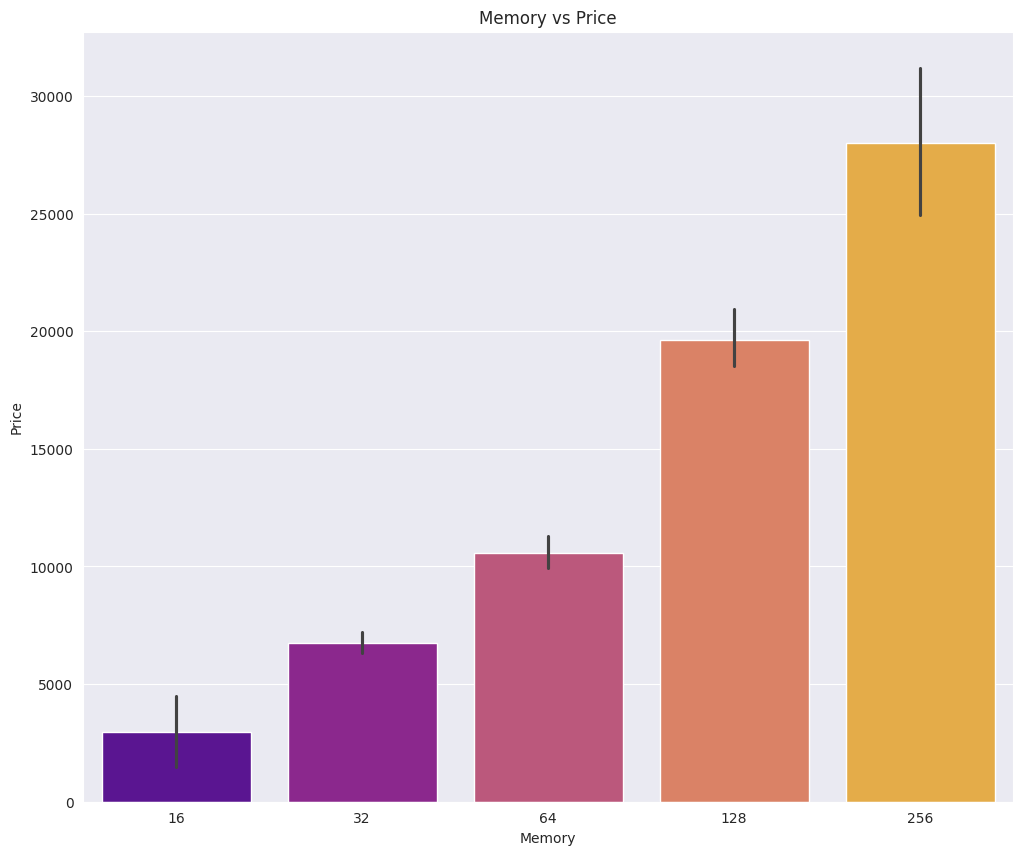

In [49]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Memory'],y=df['Price'],palette='plasma')
sns.set_style('darkgrid')
plt.xlabel('Memory')
plt.ylabel('Price')
plt.title('Memory vs Price')

Text(0.5, 1.0, 'Front Camera Distribution')

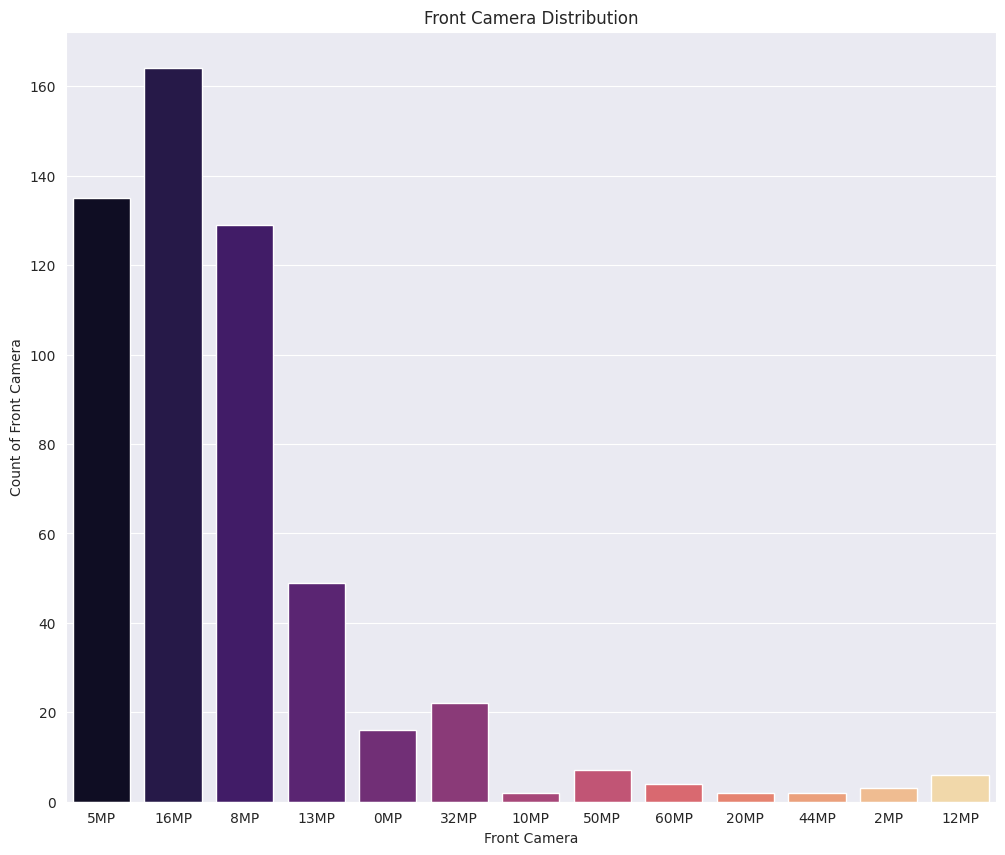

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Front Camera'],palette='magma')
sns.set_style('darkgrid')
plt.xlabel('Front Camera')
plt.ylabel('Count of Front Camera')
plt.title('Front Camera Distribution')
#16Mega Pixel camera leading the list followed by 5 Mega Pixel

Text(0.5, 1.0, 'Front Camera vs Price')

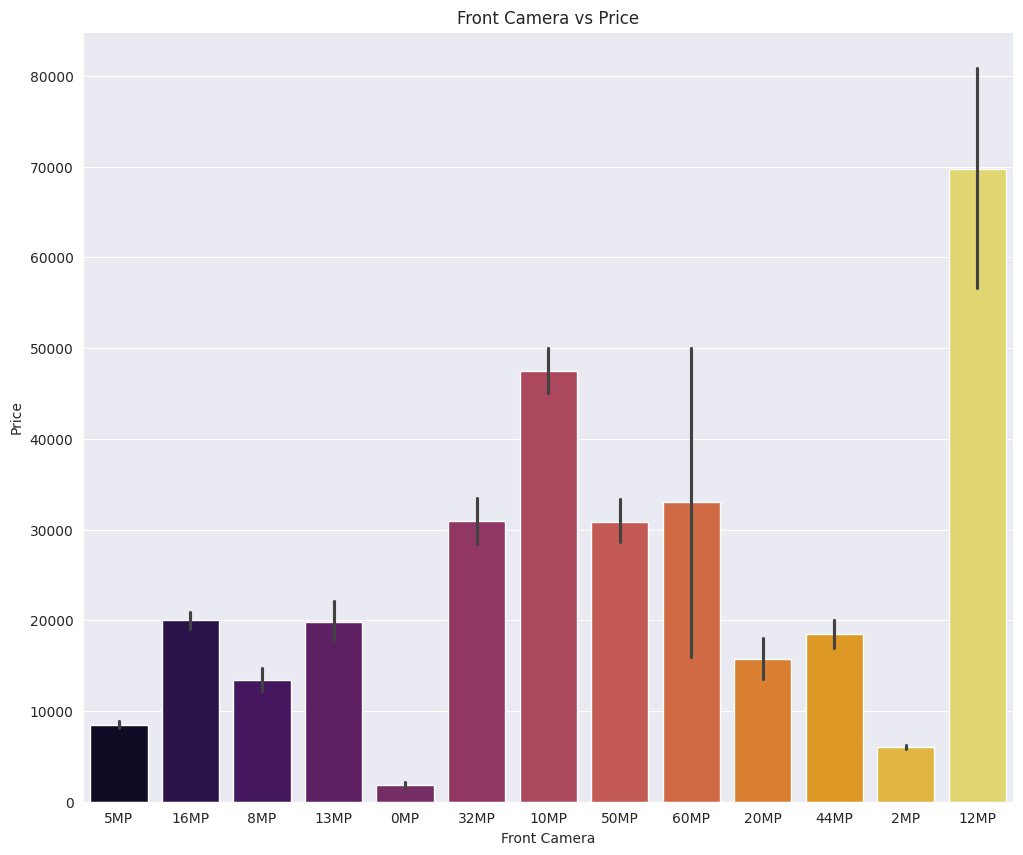

In [51]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Front Camera'],y=df['Price'],palette='inferno')
plt.xlabel('Front Camera')
plt.ylabel('Price')
plt.title('Front Camera vs Price')

<Axes: xlabel='Price'>

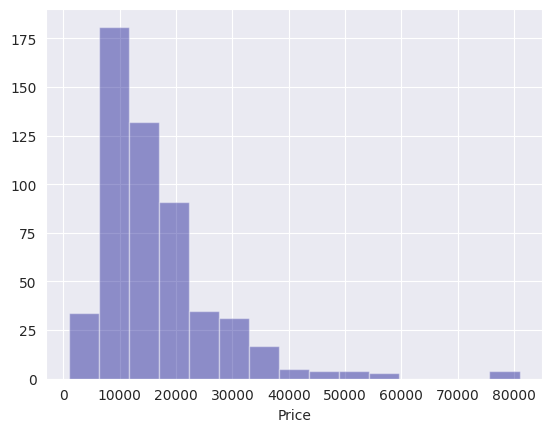

In [52]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

<Axes: xlabel='Battery_'>

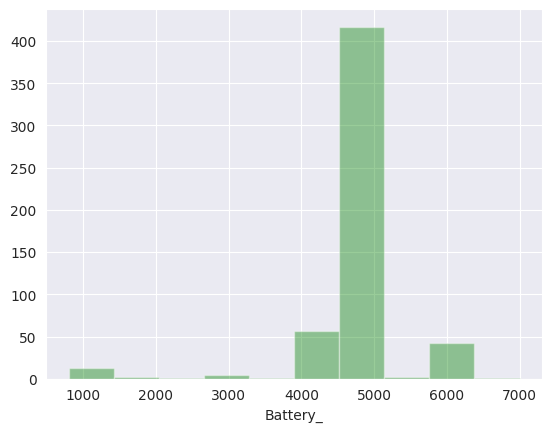

In [53]:
sns.distplot(df['Battery_'].dropna(),kde=False,color='green',bins=10)

In [54]:
def find_skewness(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Calculate skewness for each numeric column
    skewness = df[numeric_columns].skew()

    # Print skewness for each column
    for col, skew_value in skewness.items():
        print(f'Skewness of {col}: {skew_value:.4f}')

    return skewness
#Find Skewness of the numeric columns

In [55]:
find_skewness(df_final)

Skewness of Model: 0.4641
Skewness of Colour: 0.2490
Skewness of Memory: 1.0297
Skewness of RAM: 0.0676
Skewness of Battery_: -3.3042
Skewness of Rear Camera: -0.7500
Skewness of Front Camera: -0.0729
Skewness of AI Lens: 3.6126
Skewness of Mobile Height: 1.1718
Skewness of Processor_: 0.1859
Skewness of Price: 2.4256


,0
Model,0.464149
Colour,0.248955
Memory,1.029704
RAM,0.067617
Battery_,-3.304250
Rear Camera,-0.749997
Front Camera,-0.072900
AI Lens,3.612638
Mobile Height,1.171778
Processor_,0.185926


In [56]:
df_final.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

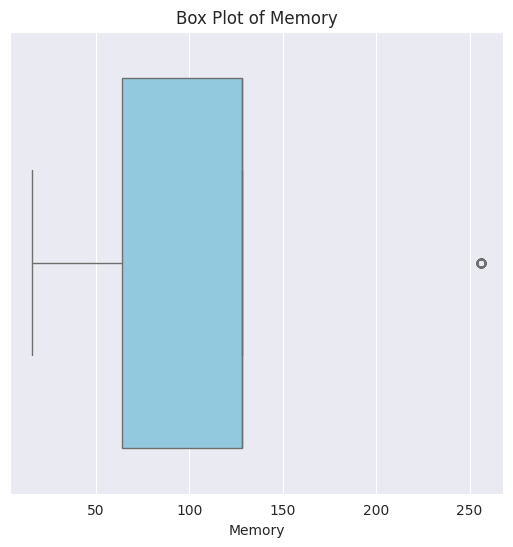

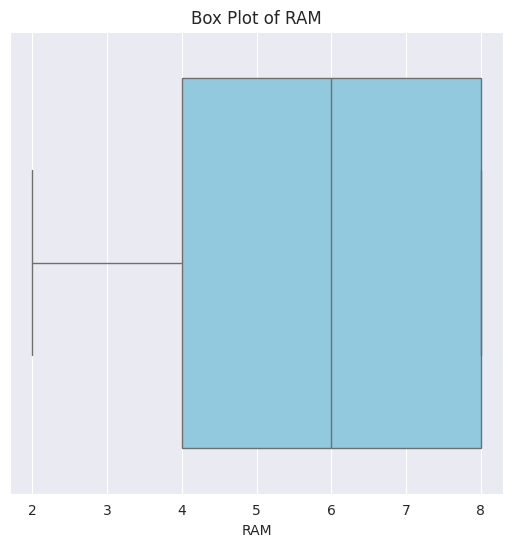

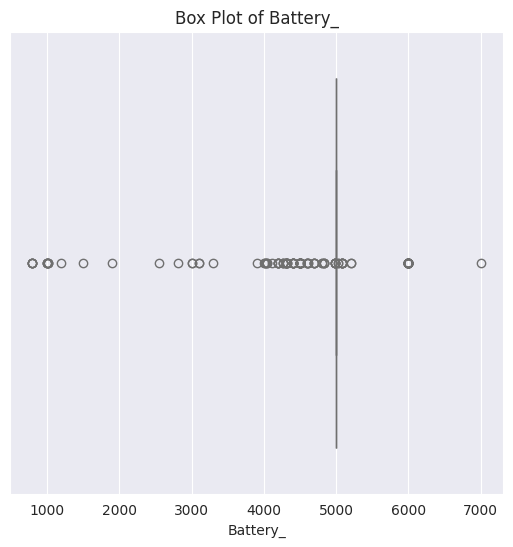

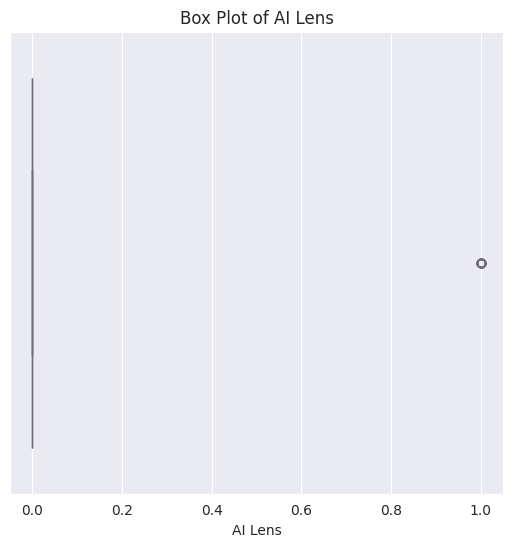

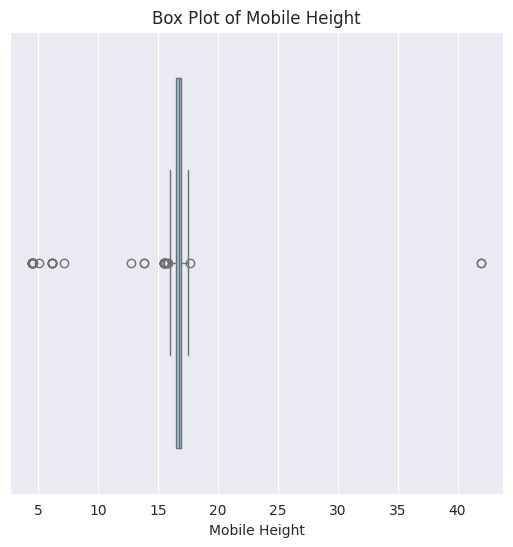

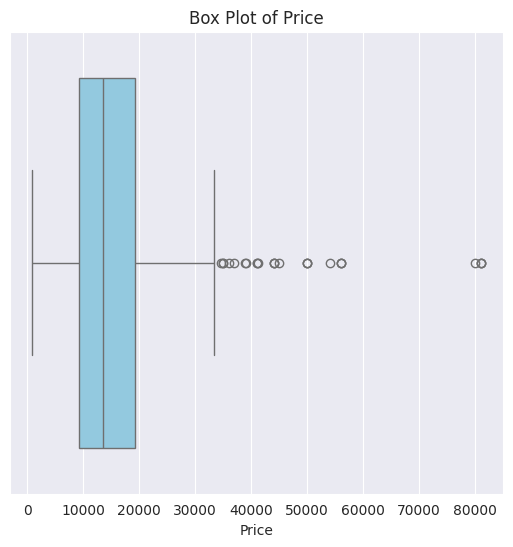

In [57]:
    for col in numerical_col:
        plt.figure(figsize=(14, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_final[col], color='skyblue')
        plt.title(f'Box Plot of {col}')



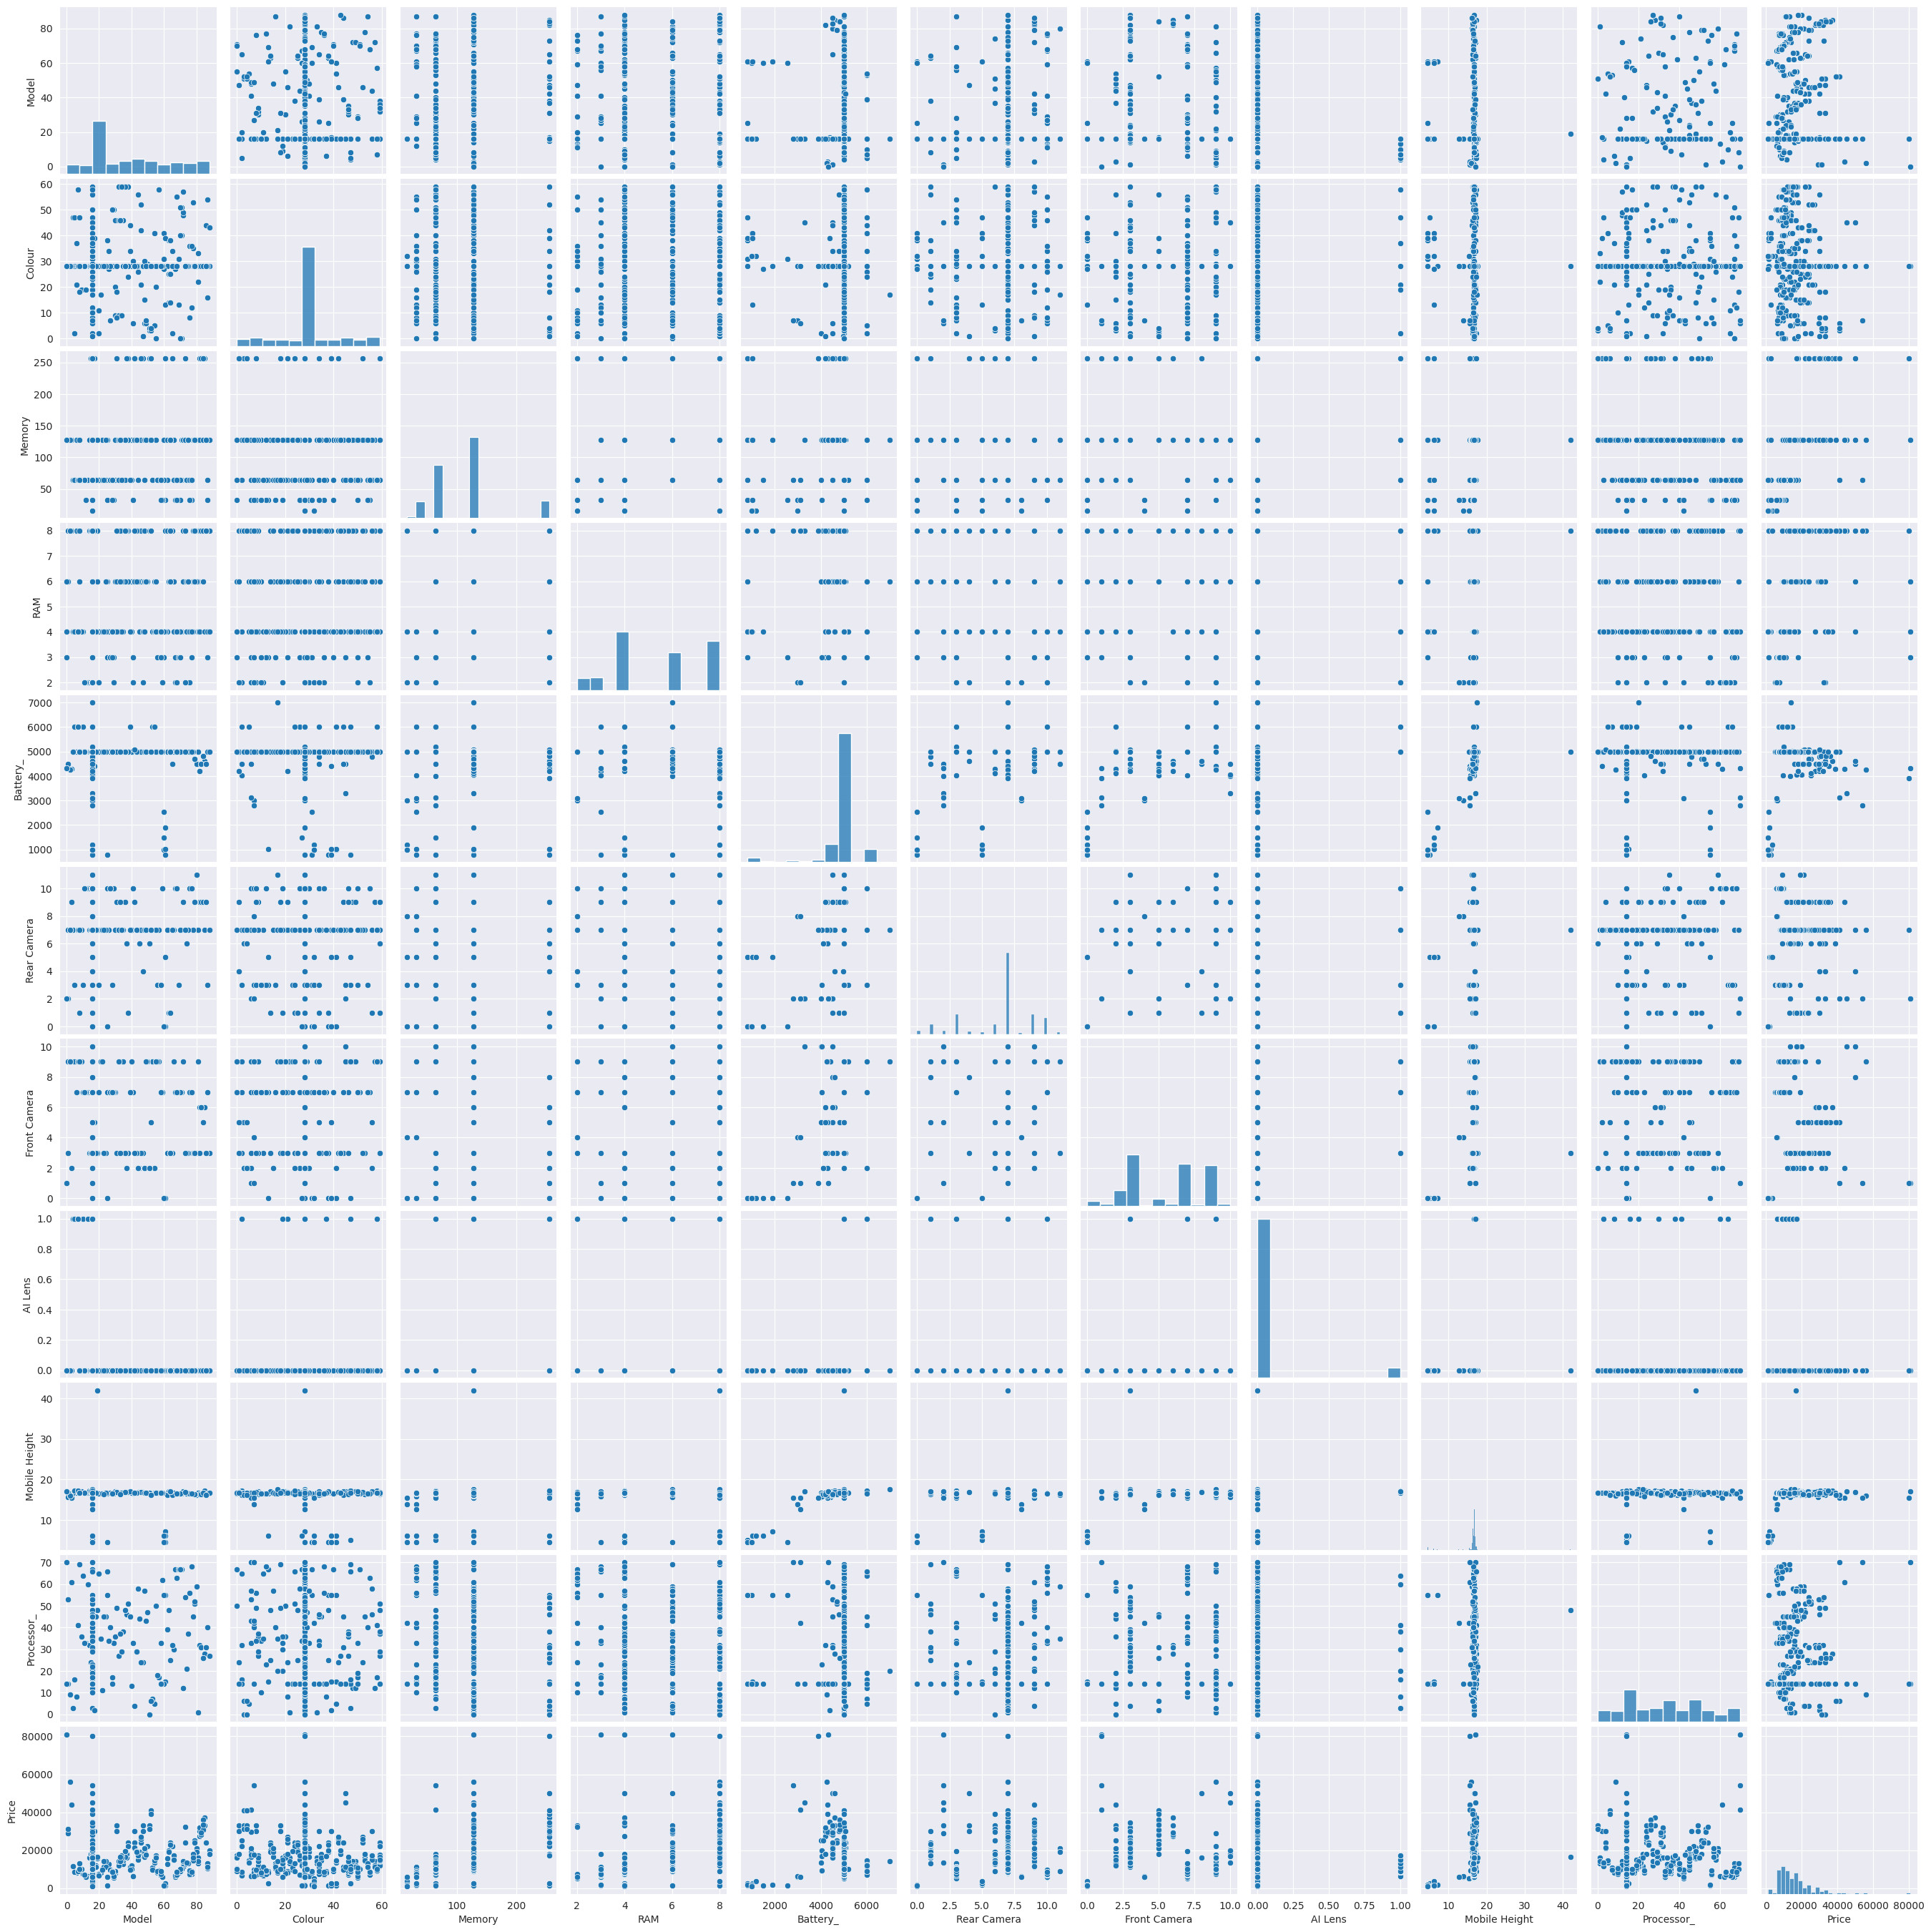

In [108]:
#Pair plot among the features of cell Phone
sns.pairplot(df_final)

**Train Test Data Split and Model Building**

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train Test Data Split

In [59]:
lr=LinearRegression()
#Linear Regression Model

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_predict=lr.predict(X_test)

In [62]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.314535259204032
4512.470979562527
94476093.10322902


In [63]:
#Training Score
print("Training Accuracy",lr.score(X_train,y_train))
#Testing Score
print("Testing Score",lr.score(X_test,y_test))

Training Accuracy 0.4404197037688825
Testing Score 0.314535259204032


In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dt=DecisionTreeRegressor()

In [66]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
y_predict=dt.predict(X_test)

In [68]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6759843613953858
1607.5229357798164
44658360.69724771


In [69]:
#Training Score
print("Training Accuracy",dt.score(X_train,y_train))
#Testing Score
print("Testing Score",dt.score(X_test,y_test))

Training Accuracy 0.9991704922816174
Testing Score 0.6759843613953858


In [70]:
from sklearn.svm import SVR
#Support Vector Regressor

In [71]:
sv=SVR()
sv.fit(X_train,y_train)

SVR()

In [72]:
y_predict=sv.predict(X_test)

In [73]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

-0.019440095212552633
6986.089000418016
140507179.45991877


In [74]:
#Training Score
print("Training Accuracy",sv.score(X_train,y_train))
#Testing Score
print("Testing Score",sv.score(X_test,y_test))

Training Accuracy -0.05096519980663161
Testing Score -0.019440095212552633


In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lor=LogisticRegression()

In [77]:
lor.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_predict=lor.predict(X_test)

In [79]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.32244488861293064
4727.798165137615
93385926.33027522


In [80]:
#Training Score
print("Training Accuracy",lor.score(X_train,y_train))
#Testing Score
print("Testing Score",lor.score(X_test,y_test))

Training Accuracy 0.13657407407407407
Testing Score 0.12844036697247707


In [81]:
y_test

,Price
229,8499
73,6299
352,19499
86,10999
470,12599
...,...
148,9999
46,7999
93,9999
407,8999


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
Rfr=RandomForestRegressor()

In [84]:
Rfr.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
y_predict=Rfr.predict(X_test)

In [86]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.7076186861301133
1855.0355384447357
40298271.5037096


In [87]:
#Training Score
print("Training Accuracy",Rfr.score(X_train,y_train))
#Testing Score
print("Testing Score",Rfr.score(X_test,y_test))

Training Accuracy 0.9794457471589081
Testing Score 0.7076186861301133


In [88]:
from xgboost import XGBRegressor

In [89]:
xgb=XGBRegressor(gamma=0.1)

In [91]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
y_predict=xgb.predict(X_test)

In [93]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.7564517259597778
1327.1139347181409
33567717.59817755


In [94]:
#Training Score
print("Training Accuracy",xgb.score(X_train,y_train))
#Testing Score
print("Testing Score",xgb.score(X_test,y_test))

Training Accuracy 0.9990872144699097
Testing Score 0.7564517259597778


In [95]:
from sklearn.ensemble import AdaBoostRegressor

In [96]:
Adr=AdaBoostRegressor()

In [97]:
Adr.fit(X_train,y_train)

AdaBoostRegressor()

In [98]:
y_predict=Adr.predict(X_test)

In [99]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6360356827049991
4736.90685586296
50164398.95520583


In [100]:
#Training Score
print("Training Accuracy",Adr.score(X_train,y_train))
#Testing Score
print("Testing Score",Adr.score(X_test,y_test))

Training Accuracy 0.7642416567313581
Testing Score 0.6360356827049991


In [101]:
import pandas as pd

# Assuming you have the following scores from different models
lr_r2 = 0.3145  # Replace with your actual r2_score
lr_mae = 4512.4709  # Replace with your actual mean_absolute_error
lr_mse = 94476093.1032 # Replace with your actual mean_squared_error

dt_r2 = 0.67018 # Replace with your actual r2_score
dt_mae = 1561.08256  # Replace with your actual mean_absolute_error
dt_mse = 45458331.1192 # Replace with your actual mean_squared_error

sv_r2 = -0.0194 # Replace with your actual r2_score
sv_mae = 6986.0890 # Replace with your actual mean_absolute_error
sv_mse = 140507179.4599 # Replace with your actual mean_squared_error

lor_r2 = 0.3224  # Replace with your actual r2_score
lor_mae = 4729.7981 # Replace with your actual mean_absolute_error
lor_mse = 93385926.33  # Replace with your actual mean_squared_error

rfr_r2 = 0.7153  # Replace with your actual r2_score
rfr_mae = 1846.688  # Replace with your actual mean_absolute_error
rfr_mse = 39231390.77 # Replace with your actual mean_squared_error

xgb_r2 = 0.756  # Replace with your actual r2_score
xgb_mae =1327.11  # Replace with your actual mean_absolute_error
xgb_mse = 33567717.59 # Replace with your actual mean_squared_error

adr_r2 = 0.64  # Replace with your actual r2_score
adr_mae = 4742 # Replace with your actual mean_absolute_error
adr_mse = 48668064 # Replace with your actual mean_squared_error

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'R-squared': [lr_r2, dt_r2, sv_r2, lor_r2, rfr_r2, xgb_r2, adr_r2],
    'MAE': [lr_mae, dt_mae, sv_mae, lor_mae, rfr_mae, xgb_mae, adr_mae],
    'MSE': [lr_mse, dt_mse, sv_mse, lor_mse, rfr_mse, xgb_mse, adr_mse]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Display the table
print(df_scores)


                 Model  R-squared         MAE           MSE
0    Linear Regression    0.31450  4512.47090  9.447609e+07
1        Decision Tree    0.67018  1561.08256  4.545833e+07
2                  SVR   -0.01940  6986.08900  1.405072e+08
3  Logistic Regression    0.32240  4729.79810  9.338593e+07
4        Random Forest    0.71530  1846.68800  3.923139e+07
5              XGBoost    0.75600  1327.11000  3.356772e+07
6             AdaBoost    0.64000  4742.00000  4.866806e+07


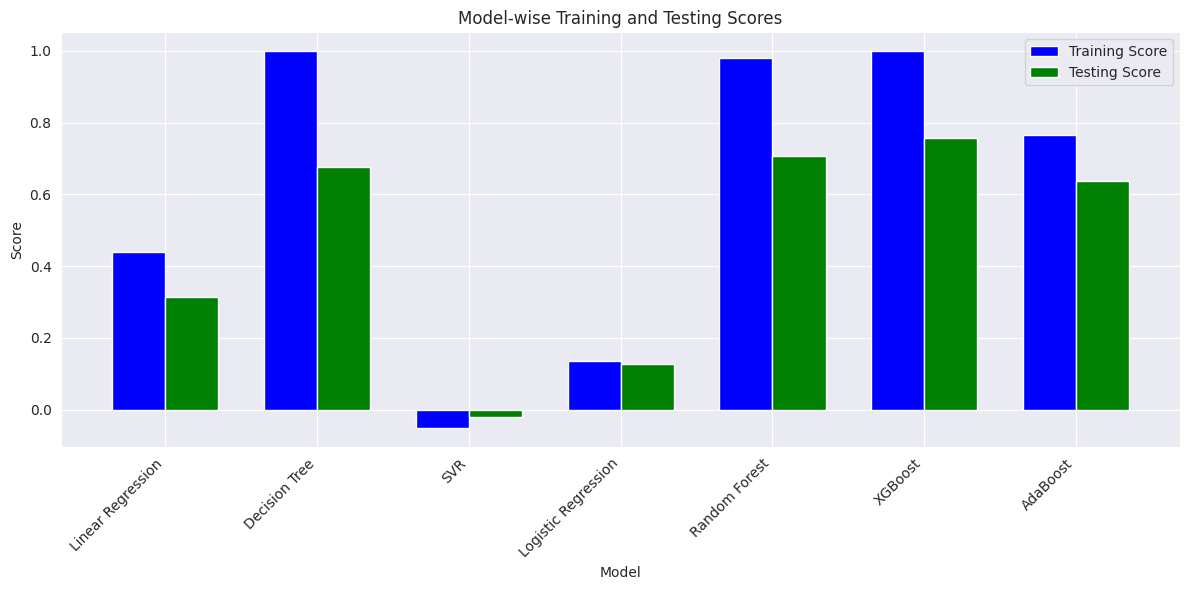

In [102]:
#Train Test Score Model wise bar Plotting

import matplotlib.pyplot as plt

# Assuming you have the following scores from different models
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

sv_train_score = sv.score(X_train, y_train)
sv_test_score = sv.score(X_test, y_test)

lor_train_score = lor.score(X_train, y_train)
lor_test_score = lor.score(X_test, y_test)

rfr_train_score = Rfr.score(X_train, y_train)
rfr_test_score = Rfr.score(X_test, y_test)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

adr_train_score = Adr.score(X_train, y_train)
adr_test_score = Adr.score(X_test, y_test)

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'Training Score': [lr_train_score, dt_train_score, sv_train_score, lor_train_score, rfr_train_score, xgb_train_score, adr_train_score],
    'Testing Score': [lr_test_score, dt_test_score, sv_test_score, lor_test_score, rfr_test_score, xgb_test_score, adr_test_score]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(df_scores))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, df_scores['Training Score'], color='blue', width=bar_width, label='Training Score')
plt.bar(r2, df_scores['Testing Score'], color='green', width=bar_width, label='Testing Score')

# Set the x-axis labels
plt.xticks([r + bar_width/2  for r in range(len(df_scores))], df_scores['Model'], rotation=45, ha='right')

# Add a legend
plt.legend()

# Add a title and labels
plt.title('Model-wise Training and Testing Scores')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.tight_layout()
plt.show()


In [104]:

from sklearn.model_selection import cross_val_score

# Define the number of folds for cross-validation
n_folds = 5  # You can adjust this value as needed

# Create a dictionary to store the cross-validation scores for each model
cv_scores = {}

# Perform cross-validation for each model
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'SVR': sv,
    'Logistic Regression': lor,
    'Random Forest': Rfr,
    'XGBoost': xgb,
    'AdaBoost': Adr
}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=n_folds, scoring='r2')
    cv_scores[model_name] = scores

# Display the cross-validation scores
for model_name, scores in cv_scores.items():
    print(f'{model_name}:')
    print(f'  Mean R-squared: {scores.mean():.4f}')
    print(f'  Standard Deviation: {scores.std():.4f}')
    print()



Linear Regression:
  Mean R-squared: -3.3614
  Standard Deviation: 7.0993

Decision Tree:
  Mean R-squared: -0.3040
  Standard Deviation: 1.4614

SVR:
  Mean R-squared: -0.2644
  Standard Deviation: 0.2597

Logistic Regression:
  Mean R-squared: 0.1797
  Standard Deviation: 0.0304

Random Forest:
  Mean R-squared: 0.2545
  Standard Deviation: 0.4926

XGBoost:
  Mean R-squared: 0.2125
  Standard Deviation: 0.6024

AdaBoost:
  Mean R-squared: 0.2884
  Standard Deviation: 0.4777



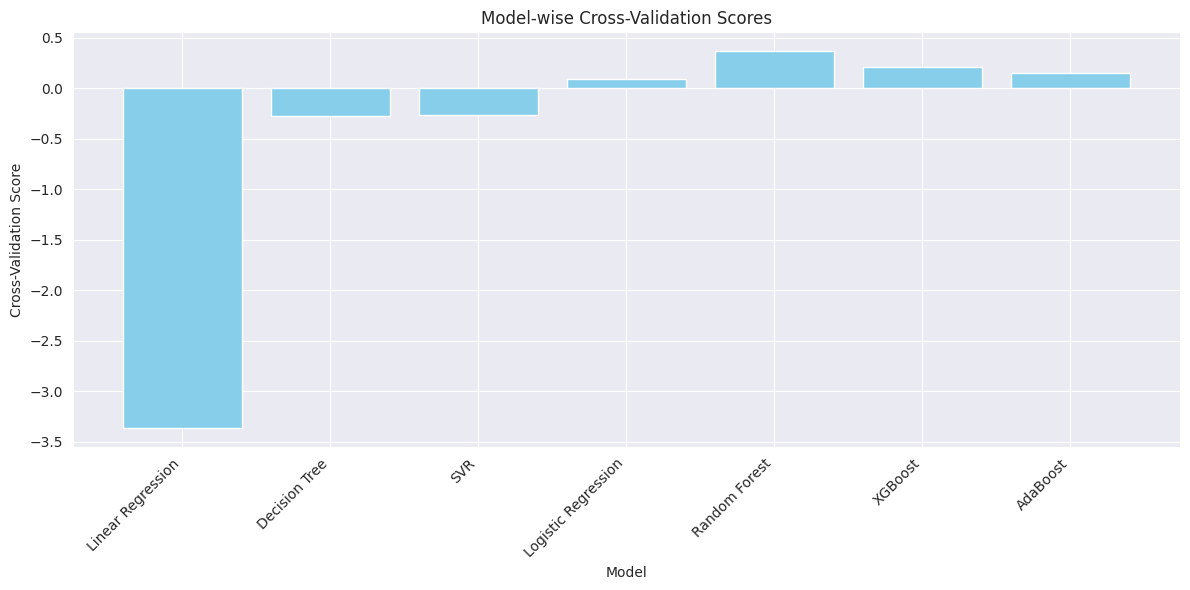

In [106]:
#  cross_val_score and plot them on a bar plot

from sklearn.model_selection import cross_val_score

# Assuming you have your X and y data prepared

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

cv_scores = {}
for model_name, model in models.items():
  scores = cross_val_score(model, X, y, cv=5)  # You can adjust the number of folds (cv) as needed
  cv_scores[model_name] = scores.mean()

# Create a DataFrame for the cross-validation scores
df_cv_scores = pd.DataFrame({'Model': list(cv_scores.keys()), 'Cross-Validation Score': list(cv_scores.values())})

# Plot the cross-validation scores
plt.figure(figsize=(12, 6))
plt.bar(df_cv_scores['Model'], df_cv_scores['Cross-Validation Score'], color='skyblue')
plt.title('Model-wise Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('Cross-Validation Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
